# 4. Salary Analysis

### Importar módulos y librerías

In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Cargar datos

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

### Limpieza de datos

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Salario según puesto de trabajo

In [4]:
# Creamos DataFrame para los salarios en Argentina y eliminamos filas con salarios nulos
df_ARG = df[(df['job_country'] == 'Argentina')].dropna(subset=['salary_year_avg'])

In [5]:
# Creamos DataFrame para guardarnos los nombres de los 5 puestos de trabajo más comunes
job_titles = df_ARG['job_title_short'].value_counts().index[:5].tolist()
job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Senior Data Engineer']

In [ ]:
# Filtramos el DataFrame para incluir solo los puestos de trabajo seleccionados
df_ARG_top5 = df_ARG[df_ARG['job_title_short'].isin(job_titles)]

df_ARG_top5

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Senior Data Engineer']

In [11]:
# Los ordenamos en una columna por la mediana del salario
job_order = df_ARG_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Engineer', 'Machine Learning Engineer', 'Data Engineer',
       'Data Analyst', 'Data Scientist'],
      dtype='object', name='job_title_short')

### Gráfico boxplot para distribuciones de salario

Para graficar los salarios del top 5 de los puestos de trabajo

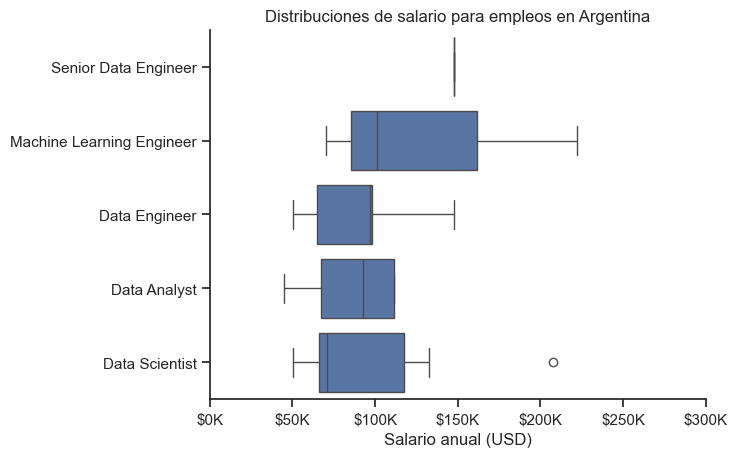

In [12]:
sns.boxplot(data=df_ARG_top5, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Distribuciones de salario para empleos en Argentina')
plt.xlabel('Salario anual (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K') # divide los valores por 1000 y añade 'K'
plt.gca().xaxis.set_major_formatter(ticks_x) # gca: get current axis 
plt.show()

### Mediana del salario vs Skill para Data Analysts

In [ ]:
# Filtramos el dataset original y creamos el DataFrame para puestos de Data Analyst en Argentina
df_DA_ARG = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Argentina')].copy()

In [25]:
# Eliminamos valores faltantes con dropna de salary_year_avg y actualizamos esa columna del DataFrame
df_DA_ARG = df_DA_ARG.dropna(subset=['salary_year_avg'])

df_DA_ARG = df_DA_ARG.explode('job_skills')

df_DA_ARG[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
93501,111202.0,sql
93501,111202.0,python
93501,111202.0,flow
345103,45000.0,sql
345103,45000.0,python


### Determinar las skills mejor pagas y las skills más demandadas

Obtenemos los top diez mejores skills pagas para Data Analysts a través de calcular la mediana del salario para cada skill

In [26]:
# Agrupamos los datos según skills, calculamos la mediana del salario y ordenamos los valores en orden descendente según la mediana
df_ARG_top_pay = df_DA_ARG.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_ARG_top_pay = df_ARG_top_pay.head(10)

df_ARG_top_pay

,count,median
job_skills,,
flow,1,111202.0
python,3,111175.0
sql,3,111175.0
excel,1,45000.0
power bi,1,45000.0
javascript,1,45000.0
sql server,1,45000.0
tableau,1,45000.0


In [27]:
# Idem código anterior, pero ordenamos los valores en orden descendente según la cantidad de skills
df_DA_skills = df_DA_ARG.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Se seleccionan las 10 skills más comunes y se ordenan por la mediana del salario
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
flow,1,111202.0
sql,3,111175.0
python,3,111175.0
excel,1,45000.0
power bi,1,45000.0
javascript,1,45000.0
sql server,1,45000.0
tableau,1,45000.0


### Gráficos de barras: skills mejor pagas y skills más demandadas

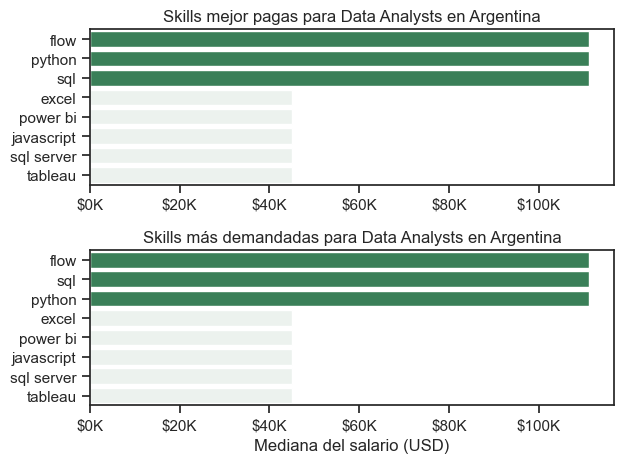

In [28]:
fig, ax = plt.subplots(2, 1)  

# Top 10 skills mejor pagas para Data Analysts
sns.barplot(data=df_ARG_top_pay, x='median', y=df_ARG_top_pay.index, hue='median', ax=ax[0], palette='light:seagreen')
ax[0].legend().remove()
ax[0].set_title('Skills mejor pagas para Data Analysts en Argentina')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 skills más demandadas para Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:seagreen')
ax[1].legend().remove()
ax[1].set_title('Skills más demandadas para Data Analysts en Argentina')
ax[1].set_ylabel('')
ax[1].set_xlabel('Mediana del salario (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()